In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix,fbeta_score,classification_report, f1_score

In [232]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [233]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [234]:
df.shape

(284807, 31)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [236]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

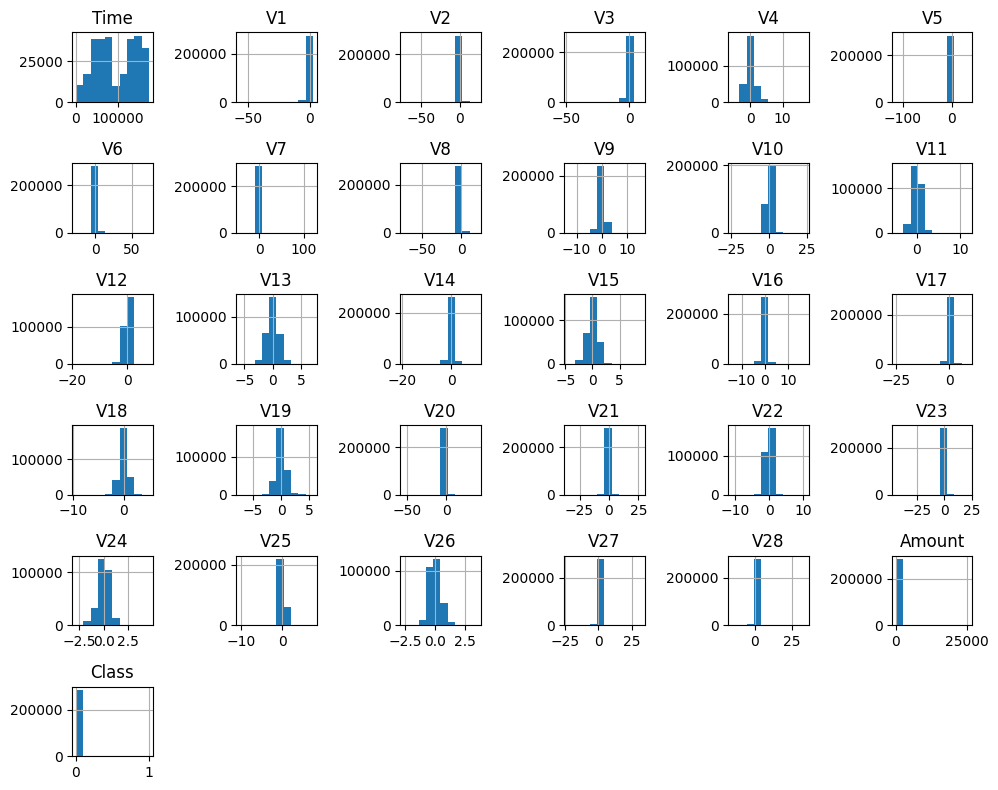

In [237]:
df.hist(figsize = (10,8))
plt.tight_layout()
plt.show()

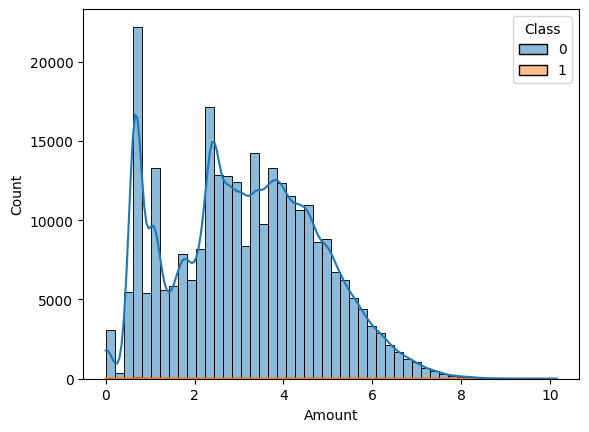

In [238]:
sns.histplot(x = np.log1p(df['Amount']),hue = df['Class'],bins = 50,kde = True)
plt.show()

In [239]:
df['Amount'] = np.log1p(df['Amount']) # log + 1 transformation because log 0 can give error

In [240]:
fraud = df[df['Class'] == 1] #Getting each row with class = 1
non_fraud = df[df['Class'] == 0] #Getting each row with class = 0

In [241]:
non_fraud_train,non_fraud_temp =  train_test_split(non_fraud,test_size = 0.4,random_state=42) #40% non_fraud data goes to temp ,  60% in training set
non_fraud_test,non_fraud_val = train_test_split(non_fraud_temp,test_size = 0.5,random_state = 42) #50% of temp goes to test and cross validation set

In [242]:
fraud_val,fraud_test = train_test_split(fraud,test_size = 0.5, random_state = 42)
val_data = pd.concat([non_fraud_val,fraud_val]) #Mixing fraud and non_fraud in cross validation set to set value of threshold
test_data = pd.concat([non_fraud_test,fraud_test]) #Testing the final model performance also by mixing fraud and non_fraud data

In [243]:
features = df.columns[1:-1]
X_train = non_fraud_train[features] #Taking every feature except time and class for training the model 
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
254899,-0.902637,-0.108342,0.694134,-5.147451,0.887418,0.986117,0.372829,0.509181,0.010098,-1.591463,...,-0.510365,-0.747936,-1.574661,-0.115743,-1.077005,0.449858,-1.323818,0.345117,0.098956,2.530517
240025,-1.025811,1.641367,-1.088995,-0.830144,0.659616,-0.203786,0.485717,0.254413,0.114418,0.506915,...,-0.016997,0.498383,1.291225,-0.052902,0.246337,-0.742027,-0.298753,-0.213394,0.315927,0.916291
188421,-0.877733,0.266160,0.492464,-2.416824,0.050137,-1.117150,0.452209,-0.196494,-1.107088,0.704825,...,0.038436,0.397644,1.279393,-0.461648,0.119134,-0.134233,-0.266323,-0.304487,-0.394285,2.631889
71202,1.053976,-0.604455,1.557519,1.498009,-1.072328,1.230171,-1.159346,0.394912,1.903301,-0.495095,...,0.019423,0.056082,0.629473,-0.337026,-0.525248,0.728233,-0.060297,0.117995,0.041644,4.100161
186301,1.927092,-0.198240,-1.282056,0.956138,0.529710,0.424907,-0.069173,0.016515,0.387276,0.338459,...,-0.075488,0.006788,0.071746,-0.049615,-1.459316,0.133411,-0.628337,0.021324,-0.053127,4.110874


In [244]:
X_val = val_data[features] #Testing on validation set
y_val = val_data['Class'] #Checking the correctness

In [245]:
X_test = test_data[features] #Testing on test set
y_test = test_data['Class'] #Validating answers

In [246]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Learns the mean and deviation and directly applies on the features
X_val_scaled = scaler.transform(X_val) #Applies the learned mean and deviation
X_test_scaled = scaler.transform(X_test)

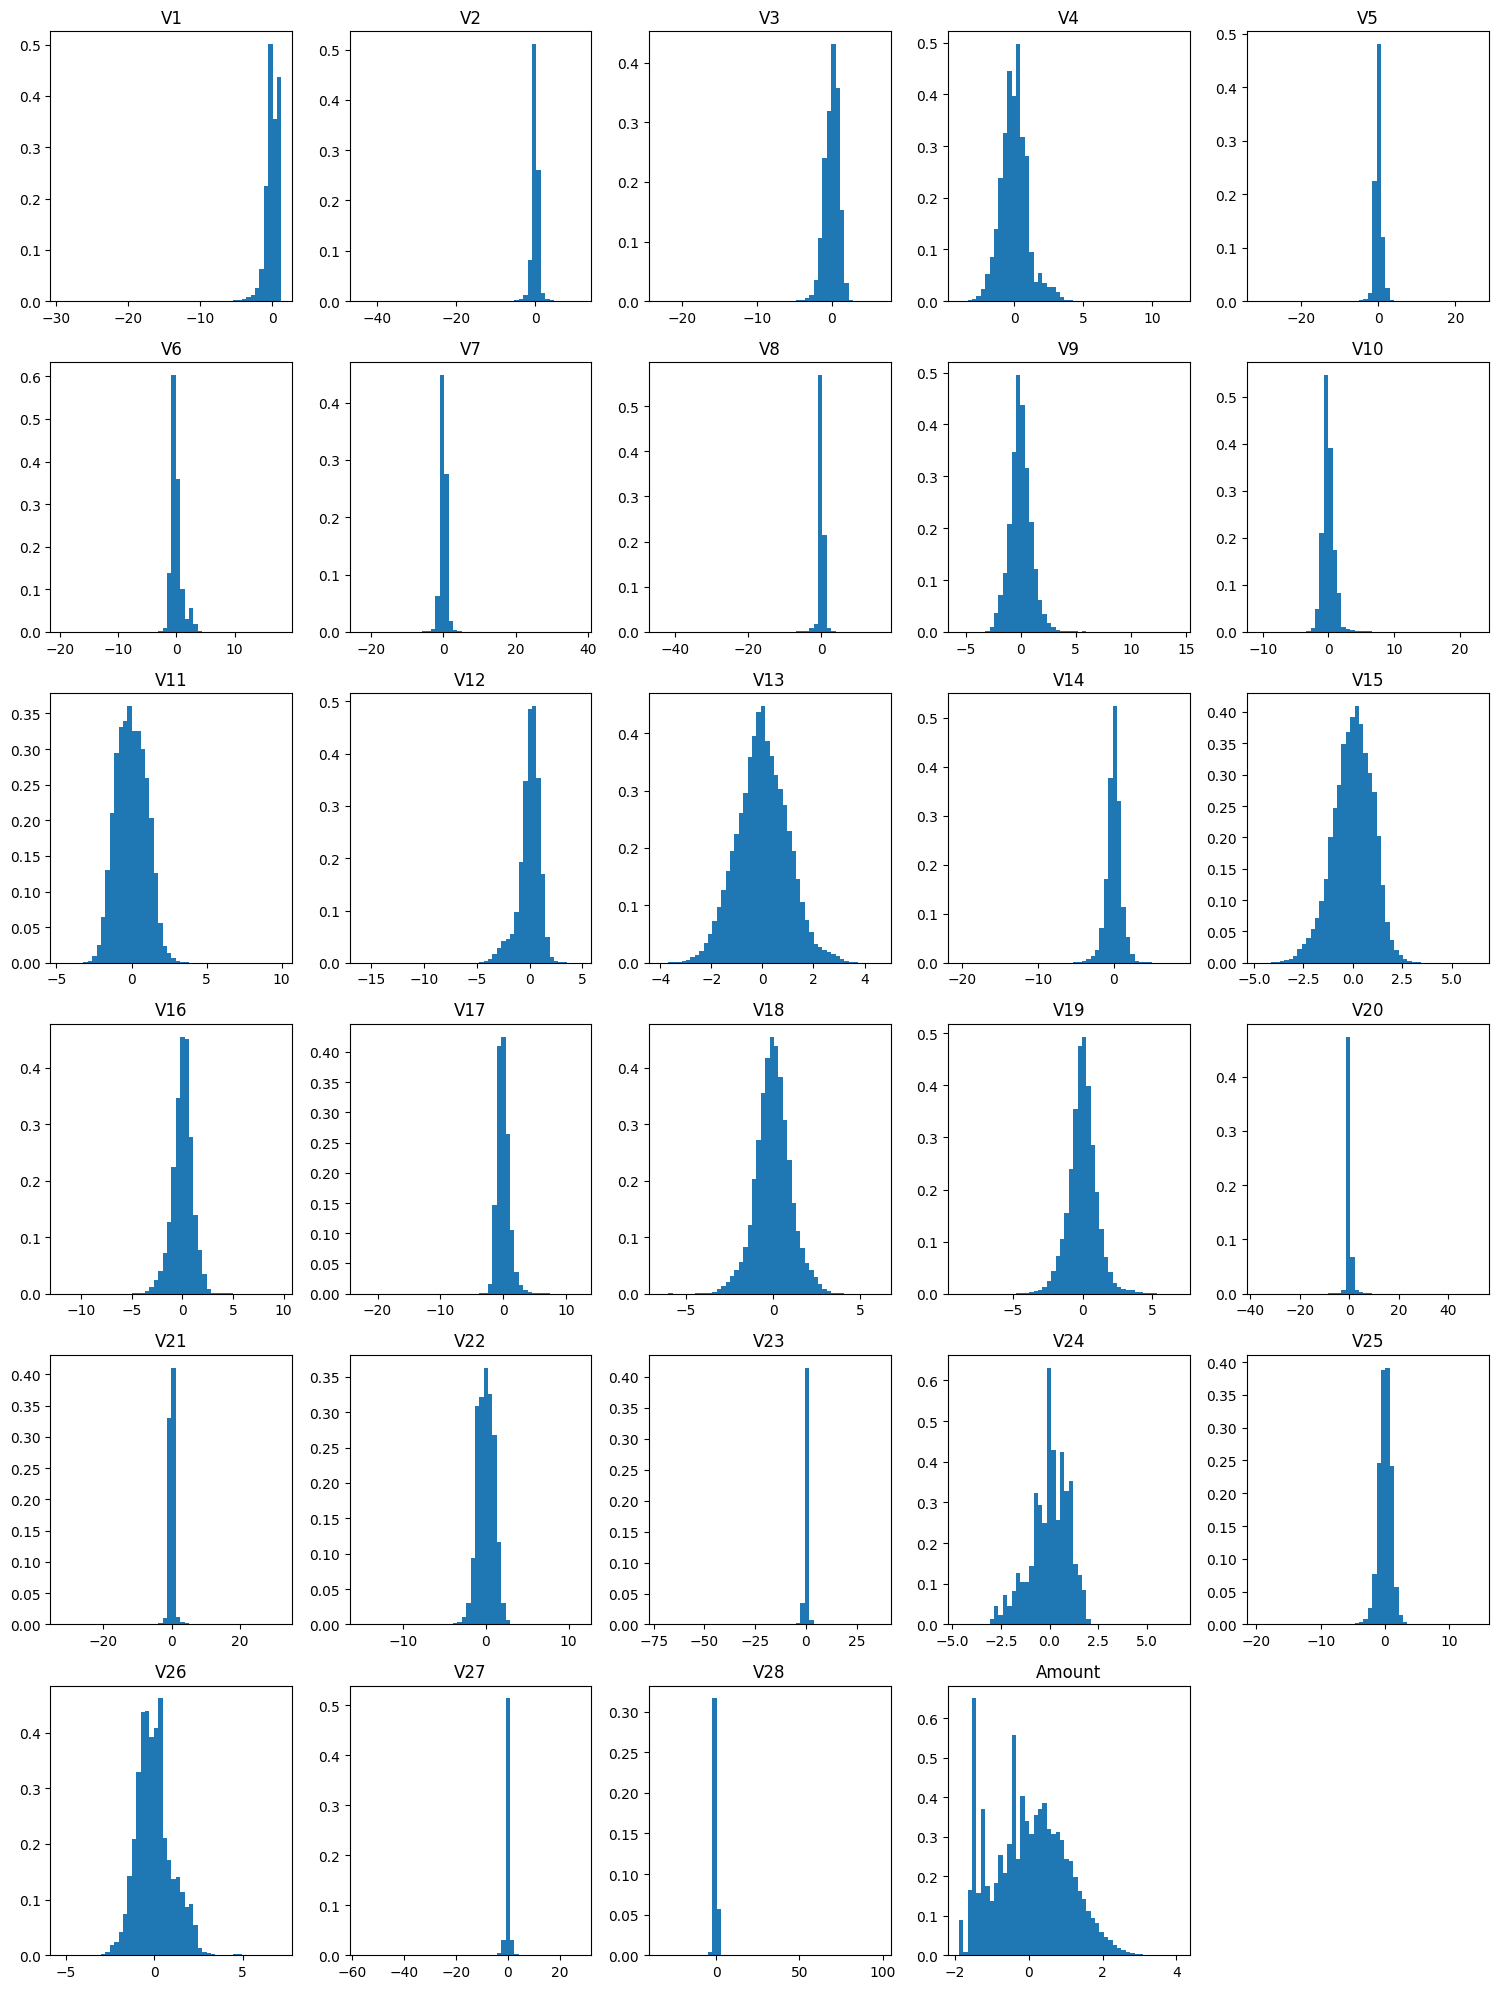

In [247]:
fig , axes = plt.subplots(6,5,figsize = (15,20)) #30 plots
for i,ax in enumerate(axes.flat):
    if i < X_train_scaled.shape[1]:
        ax.hist(X_train_scaled[:,i],bins = 50,density = True)
        ax.set_title(f"{X_train.columns[i]}")
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [248]:
mu = np.mean(X_train_scaled , axis = 0) #Takes the mean for all the row values present in each column
cov = np.cov(X_train_scaled.T) # Makes a covariance matrix to understand how features is related to each other and to itself (29x29) .T because cov accepts only rows as features


---

$$ p(\mathbf{x}) = \frac{1}{(2\pi)^{n/2} \sqrt{|\Sigma|}} \exp\left(-\frac{1}{2} (\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu)\right) $$

$$ \Sigma_{j,k} = \frac{1}{m} \sum_{i=1}^{m} (x_{i,j} - \mu_j)(x_{i,k} - \mu_k) $$

$$ d(\mathbf{x}) = \sqrt{(\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu)} $$

$$ |\Sigma| = \det(\Sigma) $$

--- 

In [249]:
def multivariate(X,mu,cov):
    n = X.shape[1]
    diff = X - mu
    cov += np.eye(n) * 1e-4 #basically adds a small value to the diagonals just in case of perfect correlation so inverse wont have an error (cant do inverse of singular)
    inv_cov = np.linalg.inv(cov) #Inverse of the covariance basically unspreads the data
    det_cov = np.linalg.det(cov) #Determinent of covariance returns scalar ensures area under density curve equals 1. Basically how spread out the data is
    temp = diff @ inv_cov
    exponent = -0.5 * np.einsum('ij,ij->i', temp, diff)
    coef = 1/np.sqrt((2 * np.pi) ** n * det_cov) #Normalization factor 
    return coef * np.exp(exponent)

In [250]:
p_train = multivariate(X_train_scaled,mu,cov)
p_val = multivariate(X_val_scaled,mu,cov)
p_test = multivariate(X_test_scaled,mu,cov)

In [251]:
def threshold(y_val,p_val):
    best_e = 0
    best_f1 = 0
    step = (p_val.max() - p_val.min())/10000 #Divides the range of values into 10000 equal steps
    for e in np.arange(p_val.min(),p_val.max(),step):
        prediction = (p_val < e).astype(int) #Checks if value less than threshold then converts to either 0 or 1
        f1 = fbeta_score(y_val,prediction,beta = 1,average = 'binary',zero_division = 0) #beta = 1 Favours precision and recall equall 
        #Precision - Fractions of predicted fraud that are actually fraud True positive + False Positive
        #Recall - Fraction of actual fraud that was predicted True Postive + False Negative
        #f1 mean of precision and recall
        #_ support value 
        if f1 > best_f1:
            best_f1 = f1
            best_e = e
    return best_e,best_f1

In [252]:
e,f1 = threshold(y_val,p_val)
print(f"Best epsilon: {e}, Best F1-Score: {f1}")

Best epsilon: 4.667548209927263e-17, Best F1-Score: 0.023613595706618962


In [253]:
prediction = (p_test < e).astype(int)

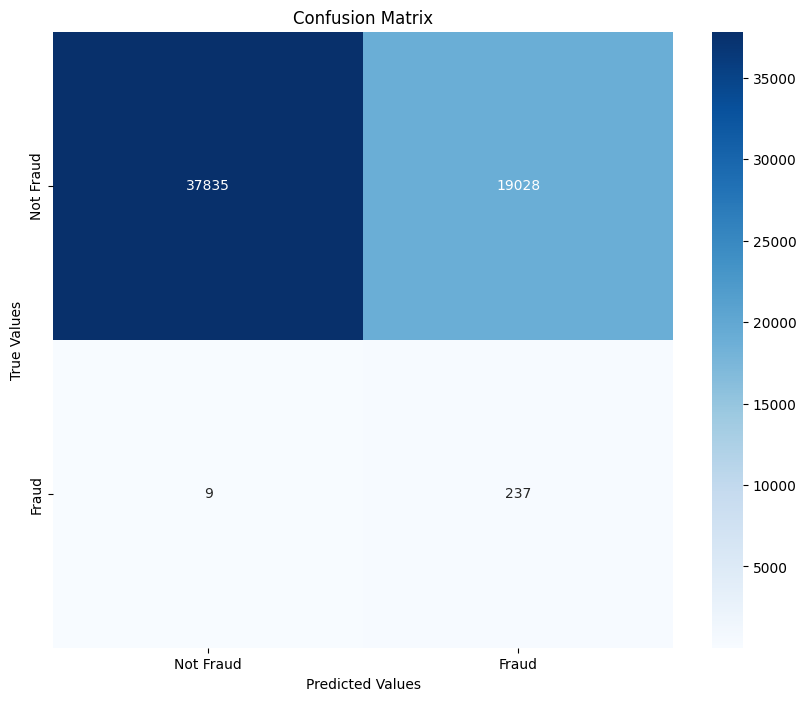

In [254]:
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot=True,cmap = 'Blues',fmt = 'd',xticklabels=['Not Fraud','Fraud'],yticklabels=['Not Fraud','Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()